In [1]:
from google.colab import files
files.upload()

Saving NationalNames.csv to NationalNames.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
data = pd.read_csv('NationalNames.csv')
data.head(4)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939


In [4]:
data['Name'].unique()

array(['Mary', 'Anna', 'Emma', ..., 'Zijun', 'Zilas', 'Zirui'],
      dtype=object)

In [5]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
  
data['Gender'].unique()

array([0, 1])

In [8]:
df = data.groupby('Name').mean()['Gender'].reset_index()
df['Gender'] = df['Gender'].astype('int')
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [9]:
import string
letters = list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [29]:
vocab = dict(zip(letters,range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [30]:
def word_to_num():
  for i in range(0, df.shape[0]):
    seq = [vocab[letters.lower()] for letters in df['Name'][i] ]
    df['Name'][i] = seq

In [31]:
word_to_num()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
df.head(5)

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [38]:
X =df['Name'].values
y =df['Gender'].values


In [39]:
name_length =[ len(X[i]) for i in range(0, df.shape[0]) ]
name_length


[5,
 5,
 5,
 9,
 5,
 5,
 7,
 5,
 6,
 6,
 8,
 5,
 7,
 6,
 7,
 4,
 6,
 5,
 5,
 6,
 7,
 5,
 6,
 7,
 7,
 5,
 5,
 7,
 7,
 6,
 6,
 7,
 5,
 5,
 7,
 5,
 4,
 5,
 6,
 5,
 6,
 5,
 8,
 5,
 6,
 6,
 6,
 6,
 5,
 8,
 7,
 5,
 5,
 6,
 6,
 7,
 7,
 5,
 4,
 5,
 8,
 5,
 9,
 7,
 6,
 6,
 7,
 6,
 7,
 7,
 4,
 7,
 8,
 6,
 7,
 6,
 5,
 6,
 7,
 8,
 8,
 7,
 8,
 8,
 5,
 6,
 8,
 7,
 8,
 8,
 8,
 7,
 7,
 6,
 7,
 5,
 6,
 7,
 6,
 8,
 7,
 7,
 6,
 7,
 5,
 7,
 6,
 7,
 7,
 6,
 7,
 7,
 8,
 12,
 11,
 7,
 8,
 7,
 8,
 8,
 7,
 5,
 5,
 5,
 6,
 7,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 6,
 5,
 6,
 8,
 6,
 6,
 6,
 5,
 5,
 5,
 7,
 6,
 7,
 5,
 6,
 7,
 6,
 7,
 5,
 6,
 6,
 5,
 6,
 4,
 6,
 5,
 6,
 7,
 5,
 6,
 7,
 6,
 7,
 6,
 7,
 8,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 4,
 9,
 9,
 8,
 6,
 7,
 8,
 5,
 6,
 9,
 5,
 5,
 6,
 7,
 4,
 5,
 6,
 6,
 7,
 8,
 5,
 5,
 6,
 6,
 5,
 6,
 8,
 5,
 6,
 7,
 5,
 6,
 6,
 7,
 8,
 5,
 6,
 5,
 5,
 6,
 7,
 7,
 8,
 9,
 8,
 9,
 5,
 6,
 4,
 5,
 6,
 7,
 5,
 4,
 5,
 7,
 6,
 7,
 5,
 6,
 7,
 7,
 9,
 9,
 10,
 10,
 9,
 11,
 9,
 11,
 8

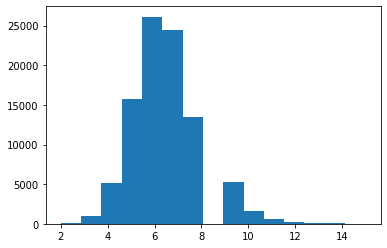

In [41]:
plt.hist(name_length, bins=15)
plt.show()

In [42]:
from keras.preprocessing.sequence import pad_sequences
x = pad_sequences(df['Name'].values, maxlen =10, padding='pre')
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [43]:
from keras.layers import Input, Embedding, Dense, LSTM
from keras.models import Model
vocab_size = len(vocab)+1
vocab_size

27

In [44]:
inp = Input(shape=(10,))
emb = Embedding(input_dim= vocab_size, output_dim = 5)(inp)
lstm1 = LSTM(units=32, return_sequences=True)(emb)
lstm2 = LSTM(units=42)(lstm1)
out = Dense(units=1, activation='sigmoid')(lstm2)
my_model = Model(inputs= inp, outputs= out)


In [45]:
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 5)             135       
                                                                 
 lstm (LSTM)                 (None, 10, 32)            4864      
                                                                 
 lstm_1 (LSTM)               (None, 42)                12600     
                                                                 
 dense (Dense)               (None, 1)                 43        
                                                                 
Total params: 17,642
Trainable params: 17,642
Non-trainable params: 0
_________________________________________________________________


In [47]:
my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])

In [50]:
his = my_model.fit(x, y, epochs= 10, batch_size= 100, validation_split= 0.2)

Epoch 1/10
752/752 [==============================] - 18s 18ms/step - loss: 0.4968 - accuracy: 0.7514 - val_loss: 0.3926 - val_accuracy: 0.8233
Epoch 2/10
752/752 [==============================] - 12s 17ms/step - loss: 0.3958 - accuracy: 0.8137 - val_loss: 0.3852 - val_accuracy: 0.8239
Epoch 3/10
752/752 [==============================] - 13s 17ms/step - loss: 0.3880 - accuracy: 0.8186 - val_loss: 0.3800 - val_accuracy: 0.8261
Epoch 4/10
752/752 [==============================] - 17s 23ms/step - loss: 0.3816 - accuracy: 0.8222 - val_loss: 0.3727 - val_accuracy: 0.8309
Epoch 5/10
752/752 [==============================] - 13s 17ms/step - loss: 0.3751 - accuracy: 0.8252 - val_loss: 0.3689 - val_accuracy: 0.8318
Epoch 6/10
752/752 [==============================] - 21s 28ms/step - loss: 0.3690 - accuracy: 0.8283 - val_loss: 0.3678 - val_accuracy: 0.8317
Epoch 7/10
752/752 [==============================] - 16s 22ms/step - loss: 0.3636 - accuracy: 0.8325 - val_loss: 0.3591 - val_accuracy:

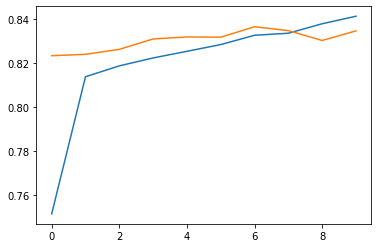

In [58]:
h = his.history
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.show()

In [72]:
name ='julia'
test_name = name.lower()
seq = [ vocab[i] for i in test_name ]
x_test = pad_sequences([seq], 10)
x_test

array([[ 0,  0,  0,  0,  0, 10, 21, 12,  9,  1]], dtype=int32)

In [73]:
y_pred =my_model.predict(x_test)
if y_pred< 0.5:
  print('Female')
else:
  print('Male')

Female
